# Logscan Comparison: Loghub 2k vs Loghub 2.0

This notebook compares the parsing accuracy of Logscan on the Loghub 2k dataset (Linux) versus the Loghub 2.0 dataset (Linux).

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Function to calculate accuracy (reused from logscan)
import numpy as np

def parsing_accuracy(data):
    log_per_template =  data['EventId'].value_counts().to_dict()
    correct = 0
    for cluster in np.unique(data['Cluster']):
        data_cluster = data.loc[data['Cluster'] == cluster]
        log_per_template_cluster =  data_cluster['EventId'].value_counts().to_dict()
        for eventid in np.unique(data_cluster['EventId']):
            if log_per_template[eventid] == log_per_template_cluster[eventid]:
                correct = correct + log_per_template_cluster[eventid]
    return correct/len(data)


In [2]:
# Load Results
path_2k = "Logscan_result/Linux_2k.log_structured.csv"
path_2_0 = "Logscan_loghub2_results/Linux_full.log_structured.csv"

results = {}

if os.path.exists(path_2k):
    df_2k = pd.read_csv(path_2k)
    acc_2k = parsing_accuracy(df_2k)
    results['Loghub 2k'] = acc_2k
    print(f"Loghub 2k Accuracy: {acc_2k:.4f}")
else:
    print(f"Warning: {path_2k} not found. Please run 'python -m logscan' to generate it.")

if os.path.exists(path_2_0):
    df_2_0 = pd.read_csv(path_2_0)
    acc_2_0 = parsing_accuracy(df_2_0)
    results['Loghub 2.0'] = acc_2_0
    print(f"Loghub 2.0 Accuracy: {acc_2_0:.4f}")
else:
    print(f"Warning: {path_2_0} not found. Please run 'python -m logscan --v2' to generate it.")


Loghub 2k Accuracy: 0.1890


Loghub 2.0 Accuracy: 0.2222


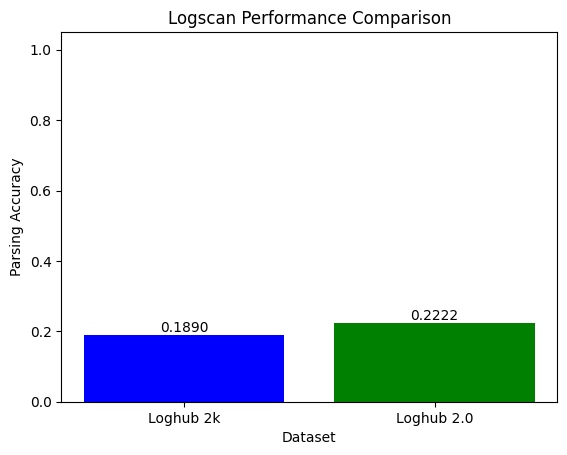

In [3]:
# Visualization
if results:
    datasets = list(results.keys())
    accuracies = list(results.values())

    plt.bar(datasets, accuracies, color=['blue', 'green'])
    plt.xlabel('Dataset')
    plt.ylabel('Parsing Accuracy')
    plt.title('Logscan Performance Comparison')
    plt.ylim(0, 1.05)
    for i, v in enumerate(accuracies):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.show()
